# goals
* explore the mismatch between lensed, RP and NP waveforms
* explore the conditions for indistinguishable waveforms

# import modules

In [1]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver1 import *
from modules.default_params_ver1 import *
from modules.functions_ver1_draft import *

# assign params

default: mcz = 20 solar masses, MLz = 2000 solar masses

In [2]:
# lens_params_1, RP_params_1, NP_params_1 = set_to_location(loc_params['sys1']['edgeon'], lens_params_0, RP_params_0, NP_params_0)
# lens_params_1["mcz"] = RP_params_1["mcz"] = NP_params_1["mcz"] = 20 * solar_mass
# lens_params_1["MLz"] = 2000 * solar_mass
# lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

In [3]:
test_loc_params = {"phi_S": np.pi/4, "theta_S": np.pi/2, "phi_J": np.pi/3, "theta_J": np.pi/6}
print(cos_i_JN(test_loc_params["phi_S"], test_loc_params["theta_S"], test_loc_params["phi_J"], test_loc_params["theta_J"]))

lens_params_1, RP_params_1, NP_params_1 = set_to_location(test_loc_params, lens_params_0, RP_params_0, NP_params_0)
lens_params_1["mcz"] = RP_params_1["mcz"] = NP_params_1["mcz"] = 20 * solar_mass
lens_params_1["MLz"] = 2000 * solar_mass
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

order of arguments: phi_S, theta_S, phi_J, theta_J
0.48296291314453416


# lensing

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

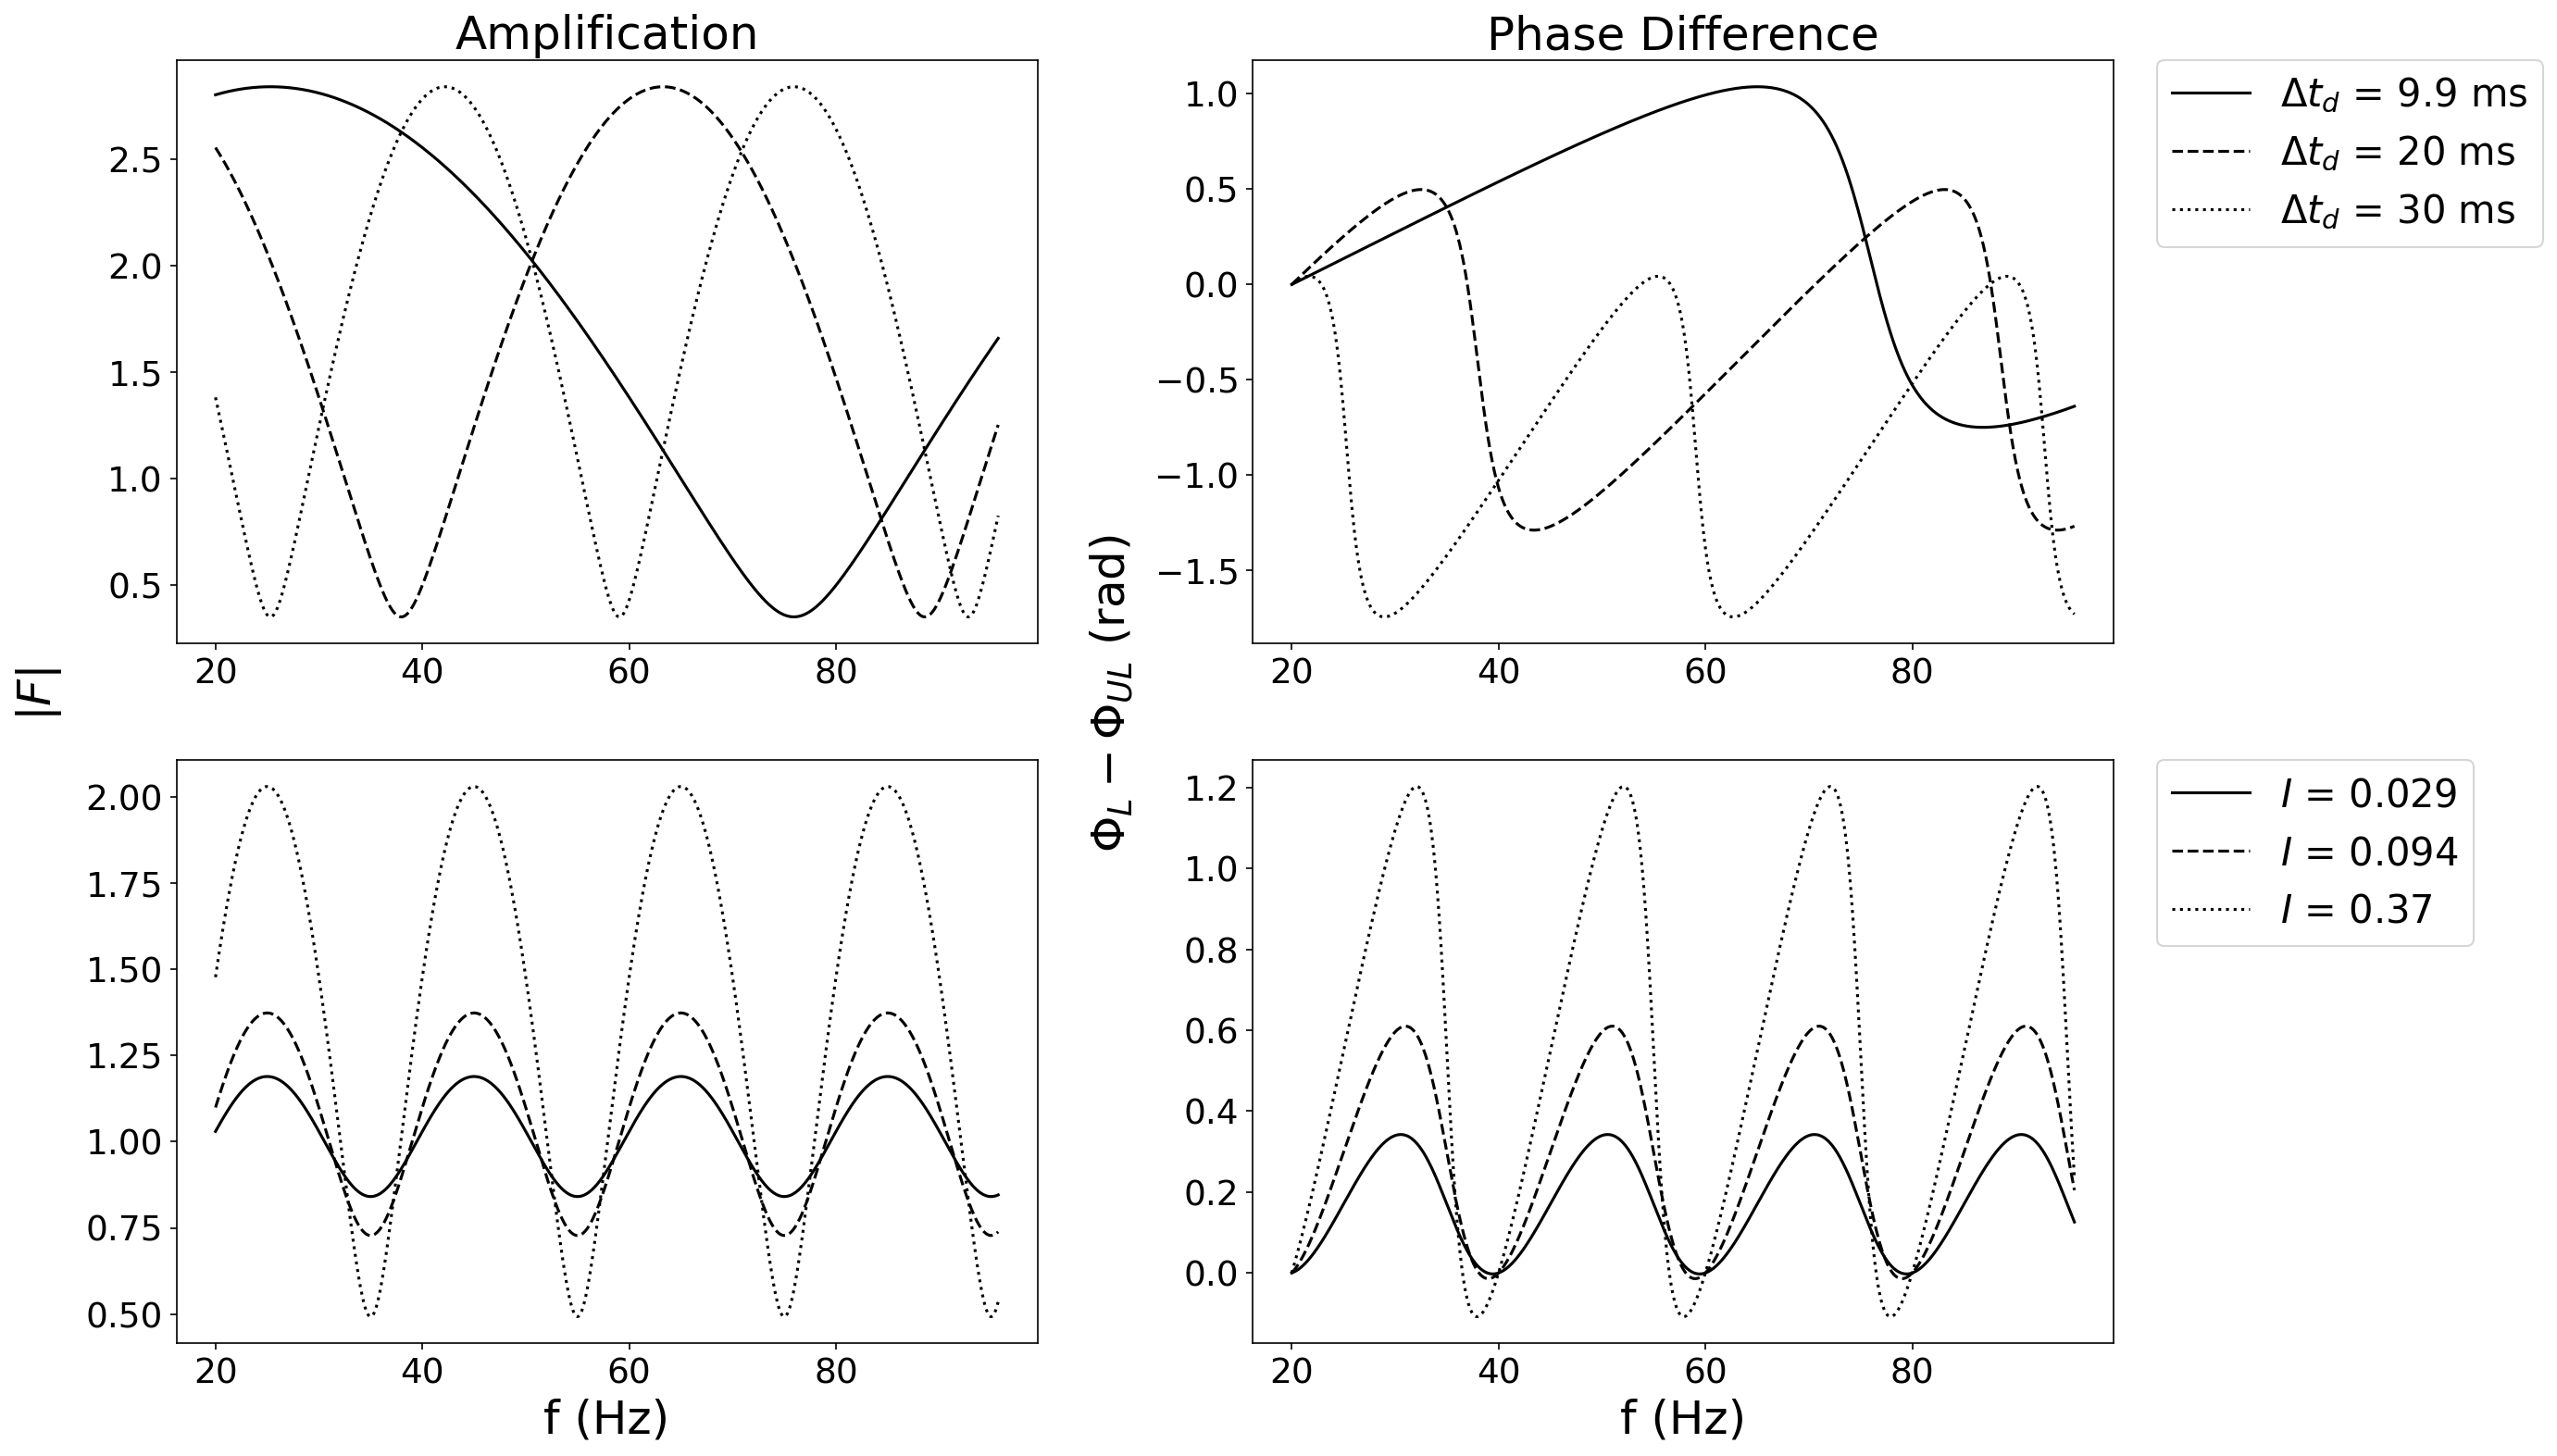

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of time delay but same I side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ['-', '--', ':']  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    Delta_td = lens_inst.Delta_td()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(f_range, np.abs(amp_fact), linestyle=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))
    axes[0, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))

axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Amplification", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of I but same time delay side by side

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 2, 3)
y_range = y_range[::-1]

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)

def to_divide(y):
    return (2 * (y * np.sqrt(y**2 + 4) + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))))

time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

lens_params = lens_params_1.copy()
line_styles = ['-', '--', ':']  # Define the line styles

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(f_range, np.abs(amp_fact), linestyle=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))
    axes[1, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))

axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|F|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_L - \Phi_{UL}$ (rad)", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

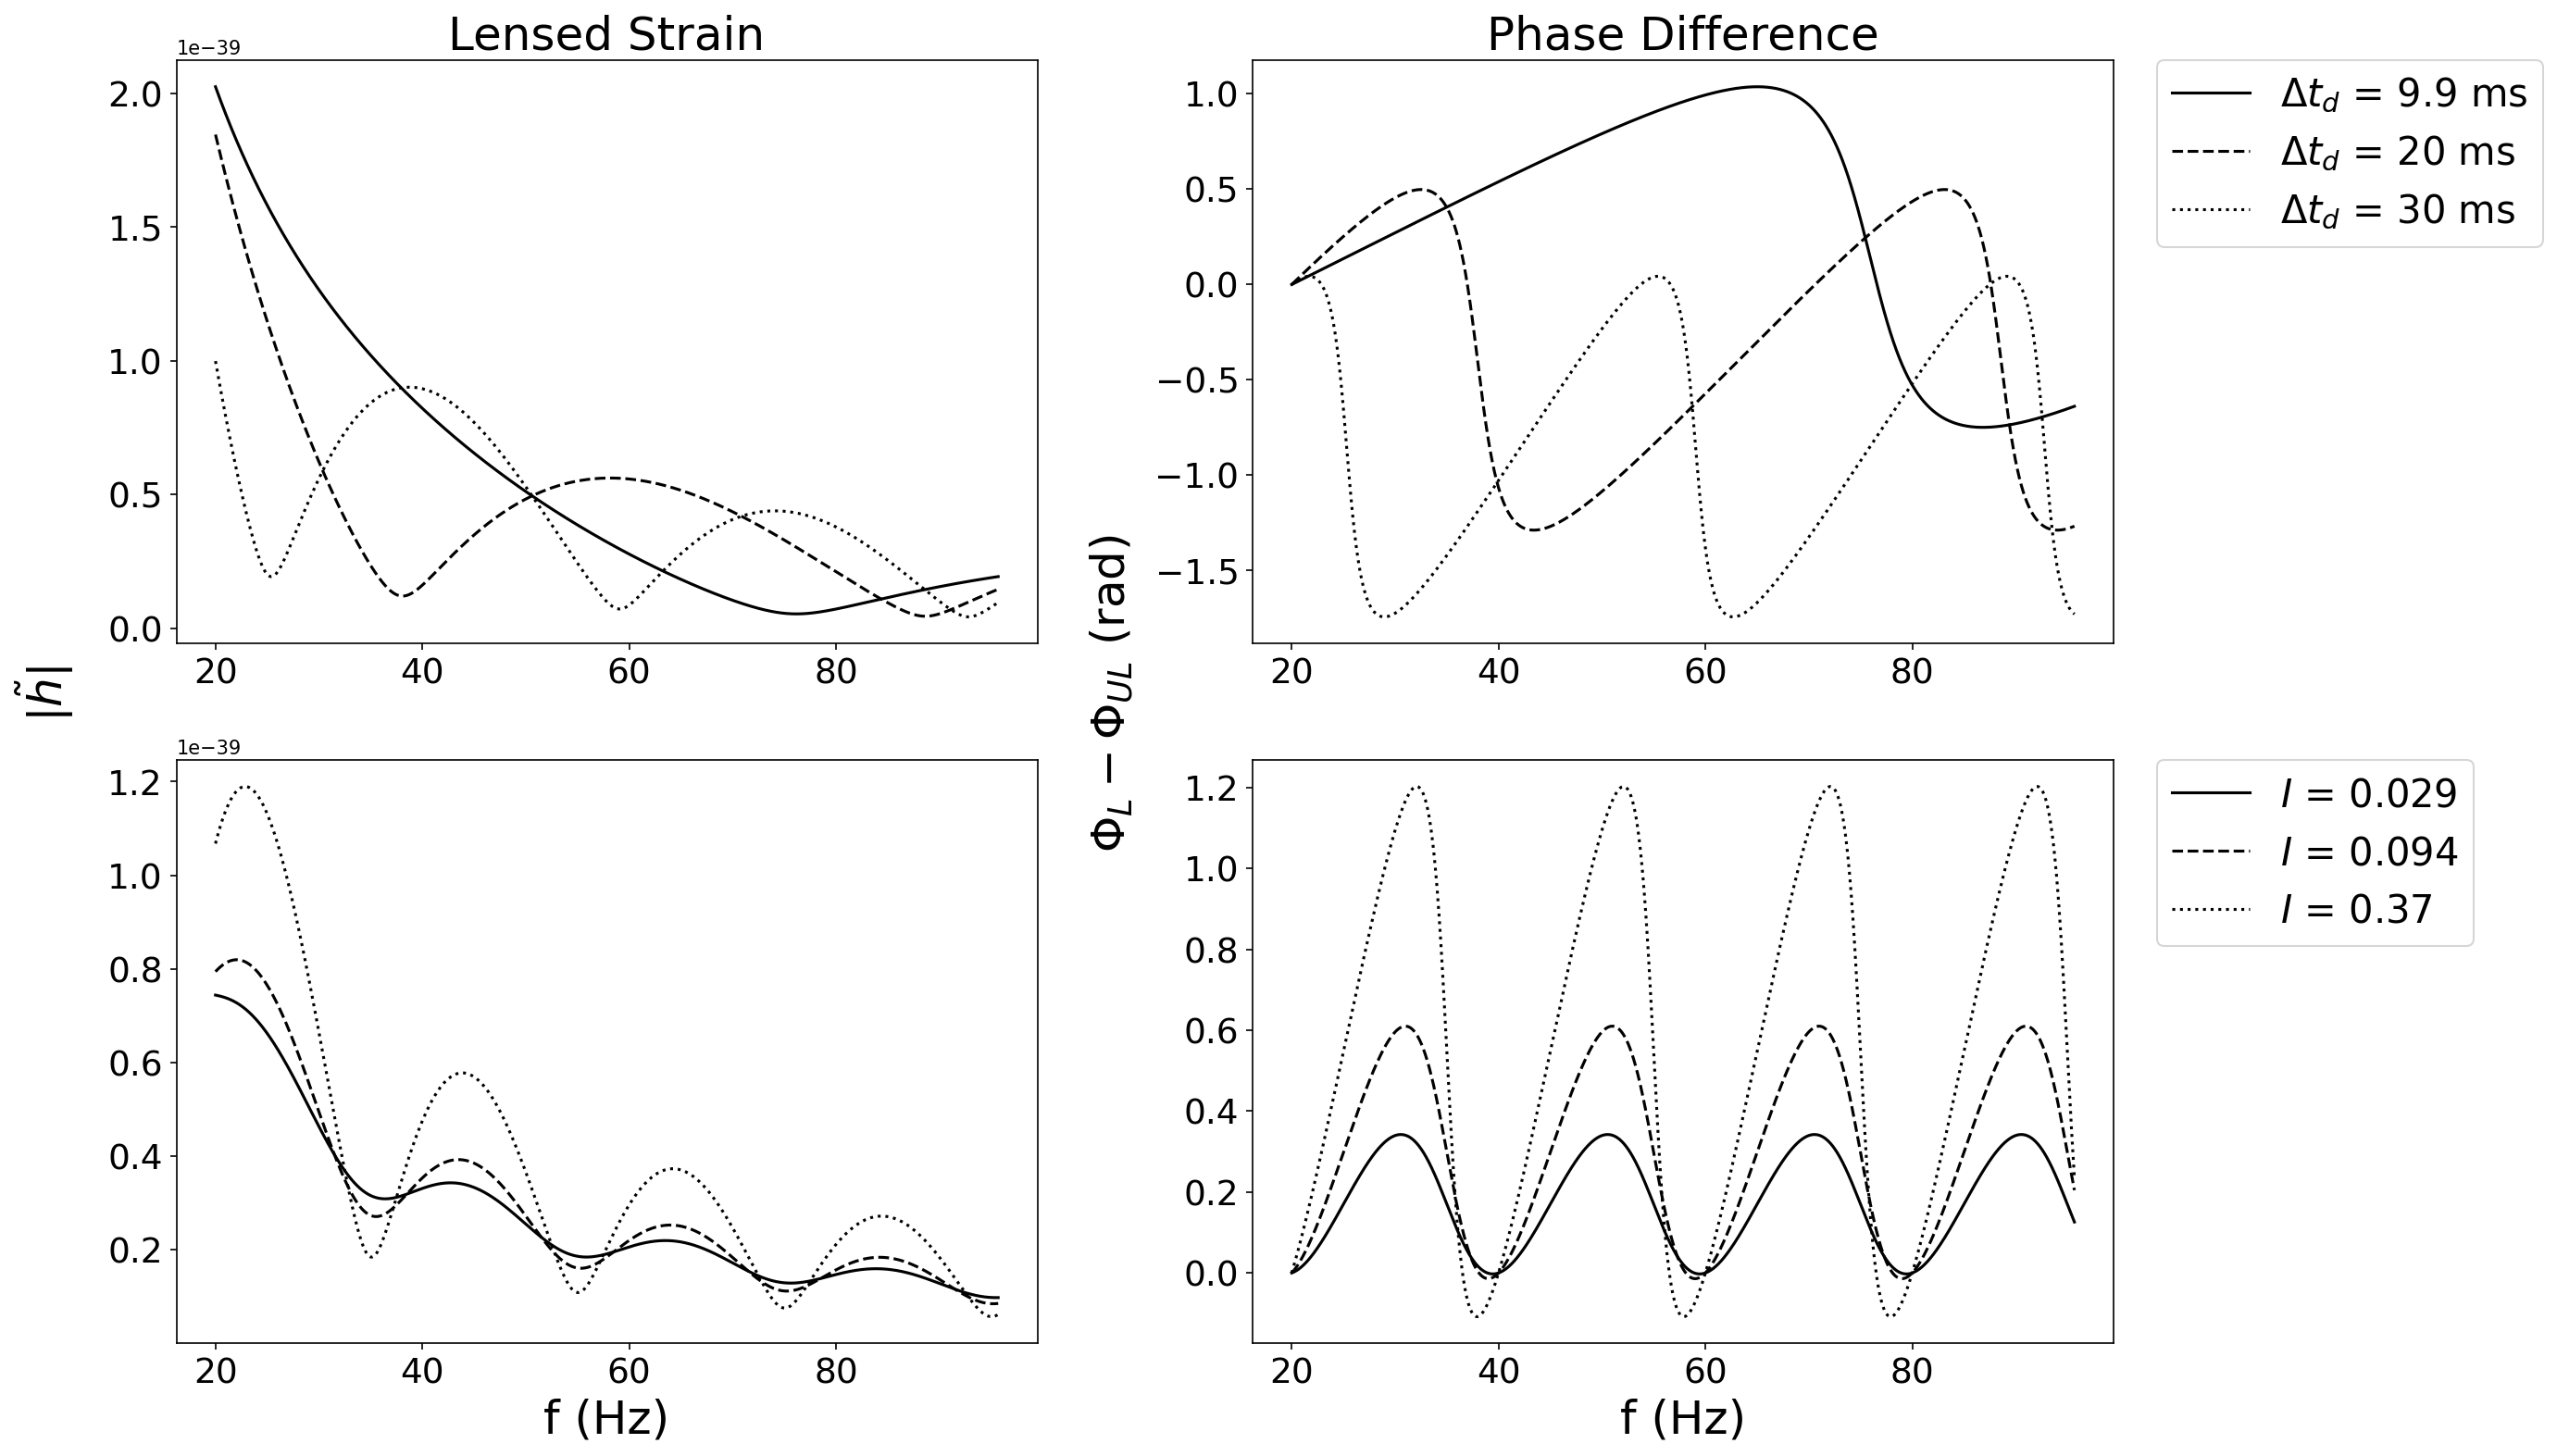

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of time delay but same I side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ['-', '--', ':']  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    Delta_td = lens_inst.Delta_td()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(f_range, np.abs(lensed_strain), linestyle=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))
    axes[0, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))

axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Lensed Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of I but same time delay side by side

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 2, 3)
y_range = y_range[::-1]

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)

def to_divide(y):
    return (2 * (y * np.sqrt(y**2 + 4) + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))))

time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

lens_params = lens_params_1.copy()

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(f_range, np.abs(lensed_strain), linestyle=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))
    axes[1, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))

axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_L - \Phi_{UL}$ (rad)", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

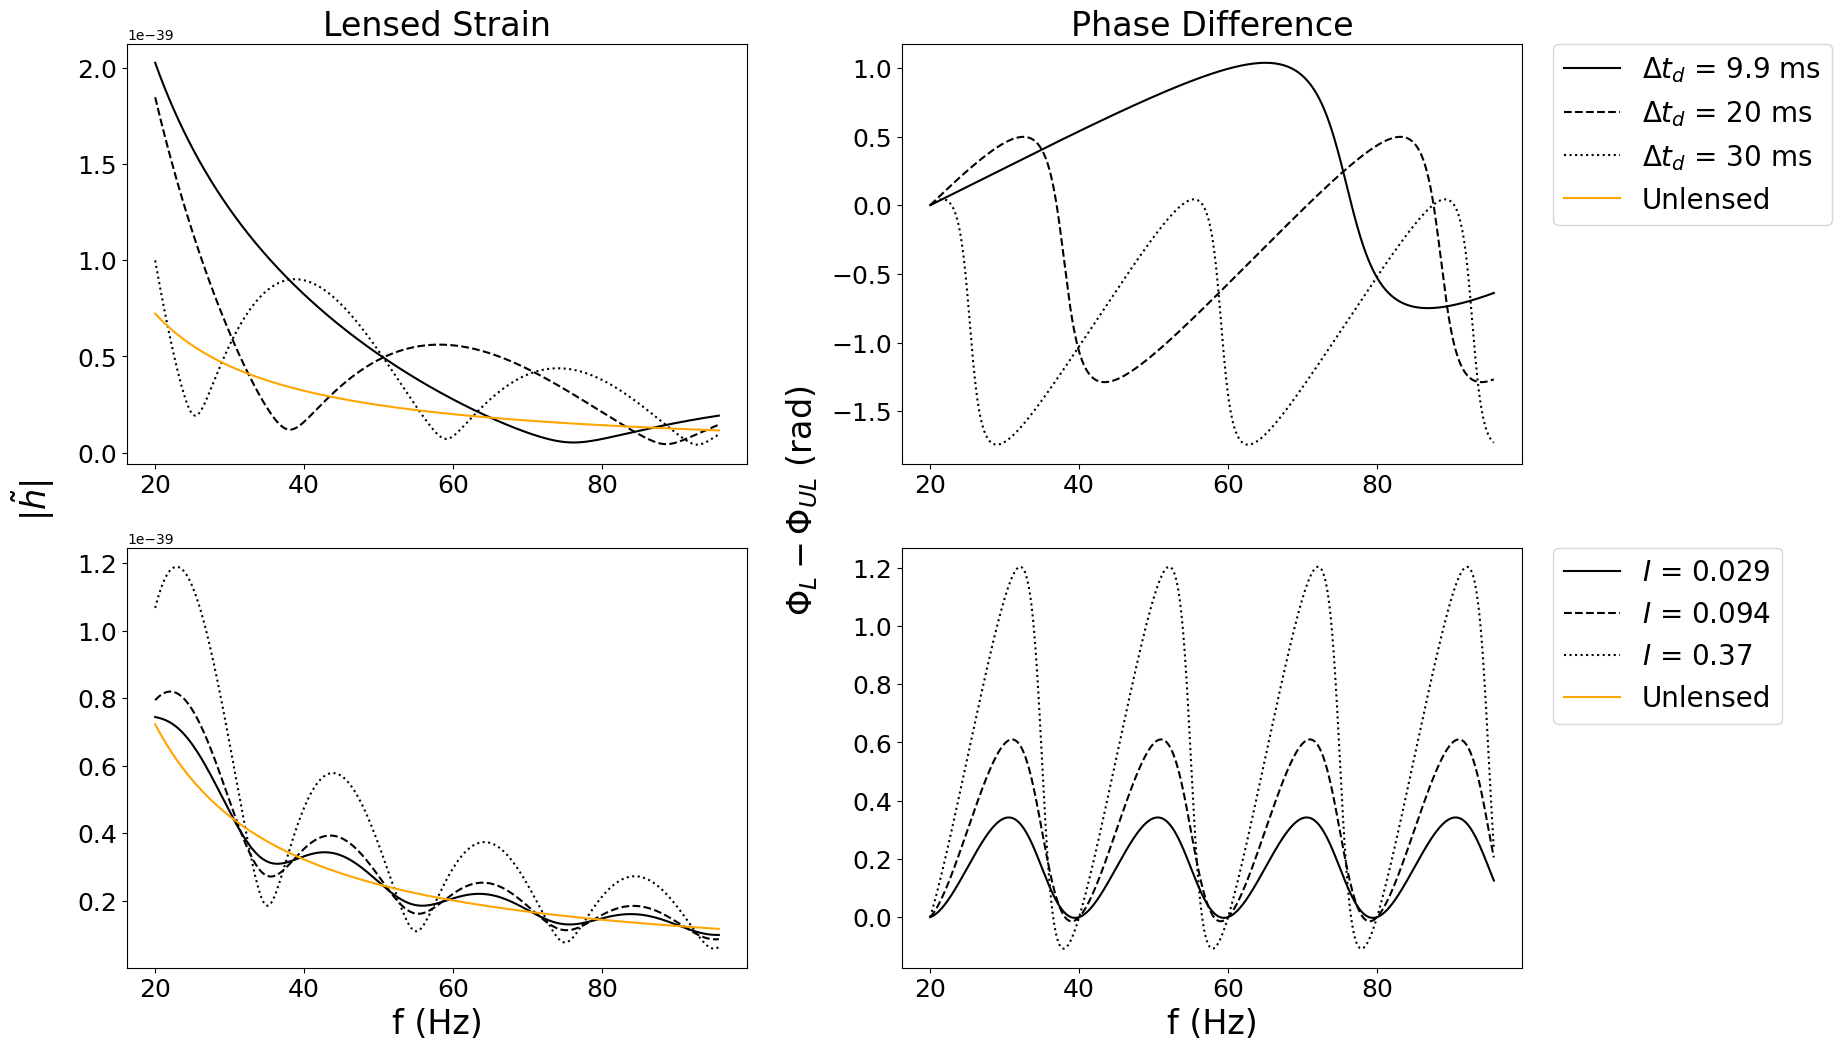

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of time delay but same I side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ['-', '--', ':']  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    Delta_td = lens_inst.Delta_td()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(f_range, np.abs(lensed_strain), ls=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))
    axes[0, 1].plot(f_range, phase_diff, ls=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))

axes[0, 0].plot(f_range, np.abs(unlensed_strain), ls='-', color='orange', label="Unlensed")
axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Lensed Strain", fontsize=24)

axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of I but same time delay side by side

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 2, 3)
y_range = y_range[::-1]

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)

def to_divide(y):
    return (2 * (y * np.sqrt(y**2 + 4) + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))))

time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

lens_params = lens_params_1.copy()

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(f_range, np.abs(lensed_strain), ls=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))
    axes[1, 1].plot(f_range, phase_diff, ls=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))

axes[1, 0].plot(f_range, np.abs(unlensed_strain), ls='-', color='orange', label="Unlensed")
axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_L - \Phi_{UL}$ (rad)", va="center", rotation="vertical", fontsize=24)

# precessing

Text(0.49, 0.5, '$\\Phi_{RP} - \\Phi_{NP}$ (rad)')

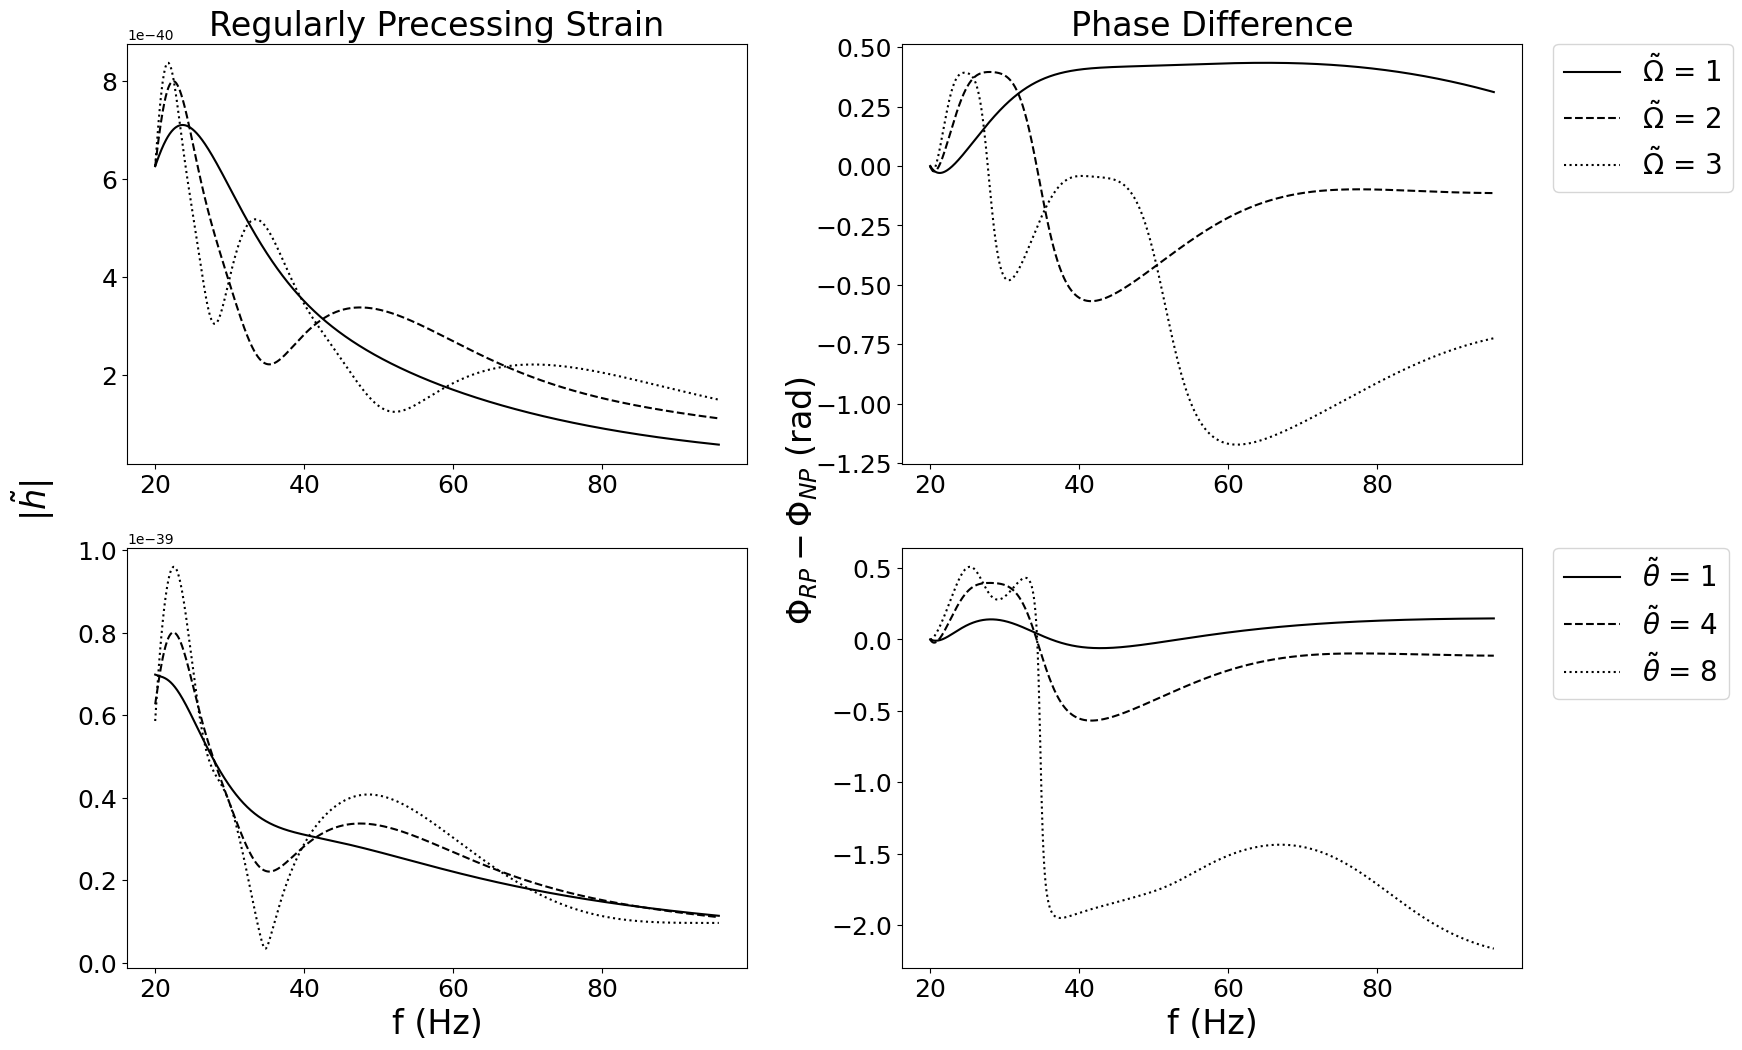

In [92]:
RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

theta_tilde_range = np.array([1, 4, 8])
line_styles = ['-', '--', ':']  # Solid, dashed, dotted

for i, theta_tilde in enumerate(theta_tilde_range):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_range)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )
    axes[1, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )

# axes[1, 0].plot(f_range, np.abs(NP_strain), label="NP", color='black', ls='-.')
axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 1].set_title("Phase Difference", fontsize=24)

RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

omega_tilde_range = np.array([1, 2, 3])

for i, omega_tilde in enumerate(omega_tilde_range):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_range)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )
    axes[0, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )

# axes[0, 0].plot(f_range, np.abs(NP_strain), label="NP", color='black', ls='-.')
axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
# axes[0, 0].set_xlabel("f (Hz)", fontsize=24)
# axes[0, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
# axes[0, 1].set_xlabel("f (Hz)", fontsize=24)
# axes[0, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_{RP} - \Phi_{NP}$ (rad)", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_{RP} - \\Phi_{NP}$ (rad)')

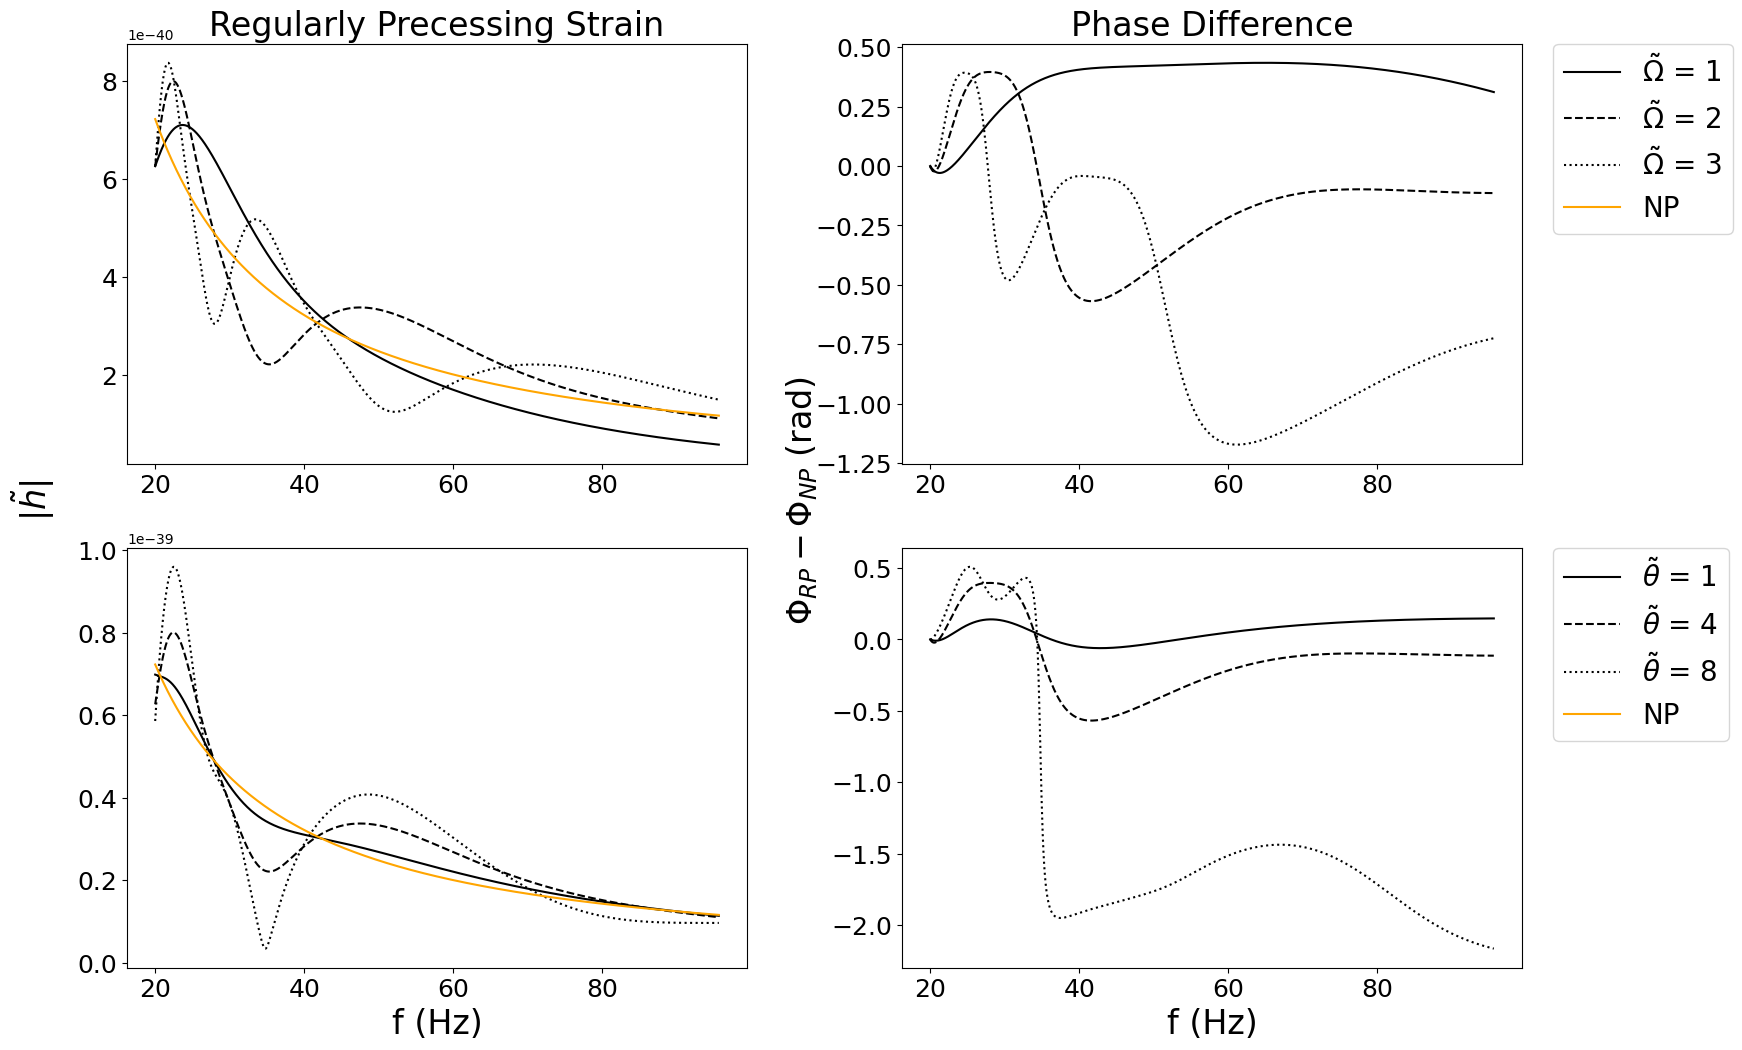

In [95]:
RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

theta_tilde_range = np.array([1, 4, 8])
line_styles = ['-', '--', ':']  # Solid, dashed, dotted

for i, theta_tilde in enumerate(theta_tilde_range):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_range)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color='black',
        ls=line_styles[i % len(line_styles)]
    )
    axes[1, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color='black',
        ls=line_styles[i % len(line_styles)]
    )

axes[1, 0].plot(f_range, np.abs(NP_strain), label="NP", color='orange', ls='-')
axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 1].set_title("Phase Difference", fontsize=24)

RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

omega_tilde_range = np.array([1, 2, 3])

for i, omega_tilde in enumerate(omega_tilde_range):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_range)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color='black',
        ls=line_styles[i % len(line_styles)]
    )
    axes[0, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color='black',
        ls=line_styles[i % len(line_styles)]
    )

axes[0, 0].plot(f_range, np.abs(NP_strain), label="NP", color='orange', ls='-')
axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
# axes[0, 0].set_xlabel("f (Hz)", fontsize=24)
# axes[0, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
# axes[0, 1].set_xlabel("f (Hz)", fontsize=24)
# axes[0, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_{RP} - \Phi_{NP}$ (rad)", va="center", rotation="vertical", fontsize=24)

# waveform comparison

In [115]:
def waveform_comparison(t_params, s_params, opt_match=True):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.25)

    updated_params = find_optimized_params(t_params, s_params, opt_match)
    t_params = updated_params["updated_t_params"]
    s_params = updated_params["updated_s_params"]
    epsilon = updated_params["updated_mismatch_results"]["mismatch"]
    idx = updated_params["updated_mismatch_results"]["index"]
    phi = updated_params["updated_mismatch_results"]["phi"]

    # template waveform
    t_gw = get_gw(t_params)
    t_phase = t_gw["phase"]

    axes[0].plot(t_gw["f_range"], np.abs(t_gw["waveform"]), label="template", color='black', linestyle='-')

    # source waveform
    s_gw = get_gw(s_params)
    s_phase = s_gw["phase"]

    axes[0].plot(s_gw["f_range"], np.abs(s_gw["waveform"]), label="source", color='black', linestyle='--')

    axes[0].legend(fontsize=20)
    axes[0].set_xlabel("f (Hz)", fontsize=24)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=24)
    axes[0].tick_params(axis="both", which="major", labelsize=18)
    axes[0].set_title("Strain", fontsize=24)

    phase_diff = s_phase - t_phase
    # phase_diff = np.unwrap(phase_diff - phase_diff[0])
    phase_diff = np.unwrap(phase_diff)

    axes[1].plot(s_gw["f_range"], phase_diff, color='black', linestyle='-')

    fig.suptitle(r"$\~\Omega$ = {:.3g}, $\~\theta$ = {:.3g}, $\epsilon = {:.3g}$".format(t_params["omega_tilde"], t_params["theta_tilde"], epsilon), fontsize=24, y=1.02)
    print(idx, phi)

    # axes[1].set_xscale("log")
    axes[1].set_xlabel("f (Hz)", fontsize=24)
    axes[1].set_ylabel(r"$\Phi_{\rm s} - \Phi_{\rm t}$ (rad)", fontsize=24)
    axes[1].tick_params(axis="both", which="major", labelsize=18)
    axes[1].set_title("Phase Difference", fontsize=24)

    # print out y axis limits for the phase difference
    print(axes[1].get_ylim())

    # set y axis limits for the phase difference
    axes[1].set_ylim(-1.65, 1.35)

-2.8073526588681567e-08 -9.275626757337675e-09
(-1.6298964787161516, 0.768079955129469)


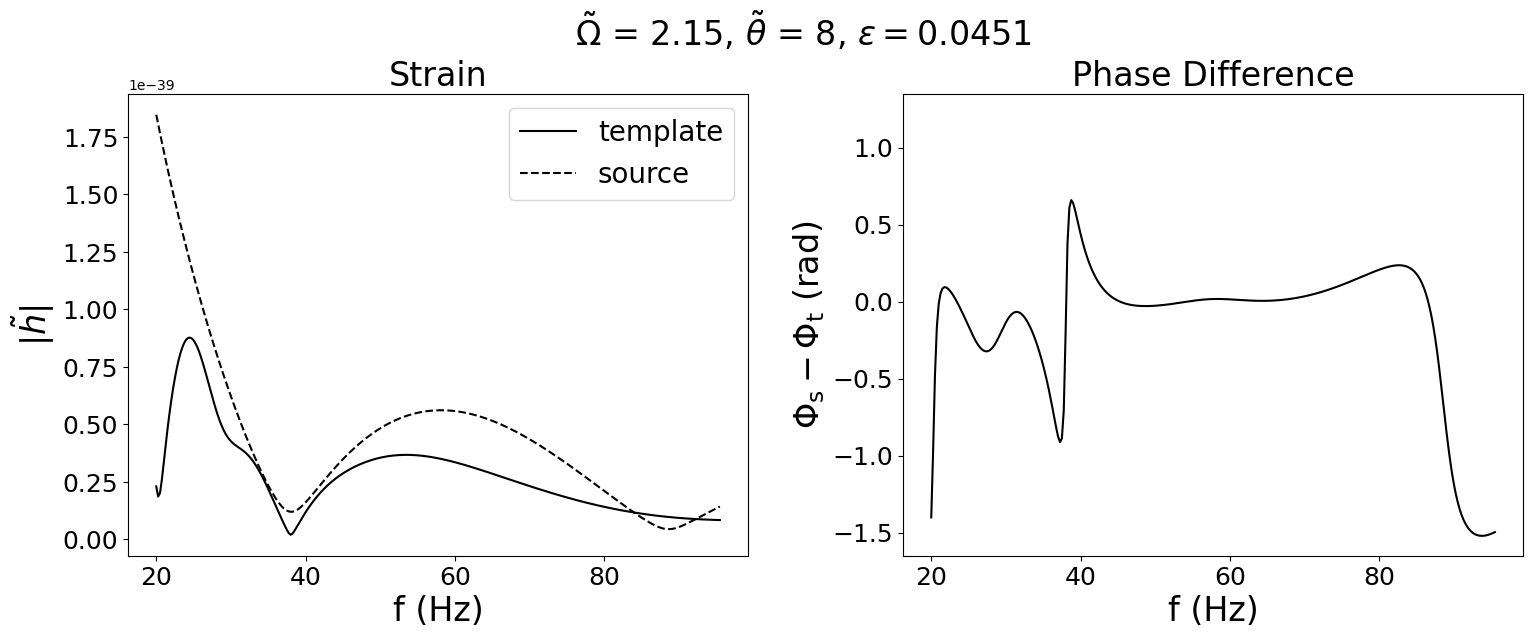

In [116]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

RP_params["omega_tilde"] = 2.15
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 5.2

waveform_comparison(RP_params, lens_params)

-8.239114148179697e-09 1.210081112387877e-08
(-1.458046383892346, 1.3208617894896701)


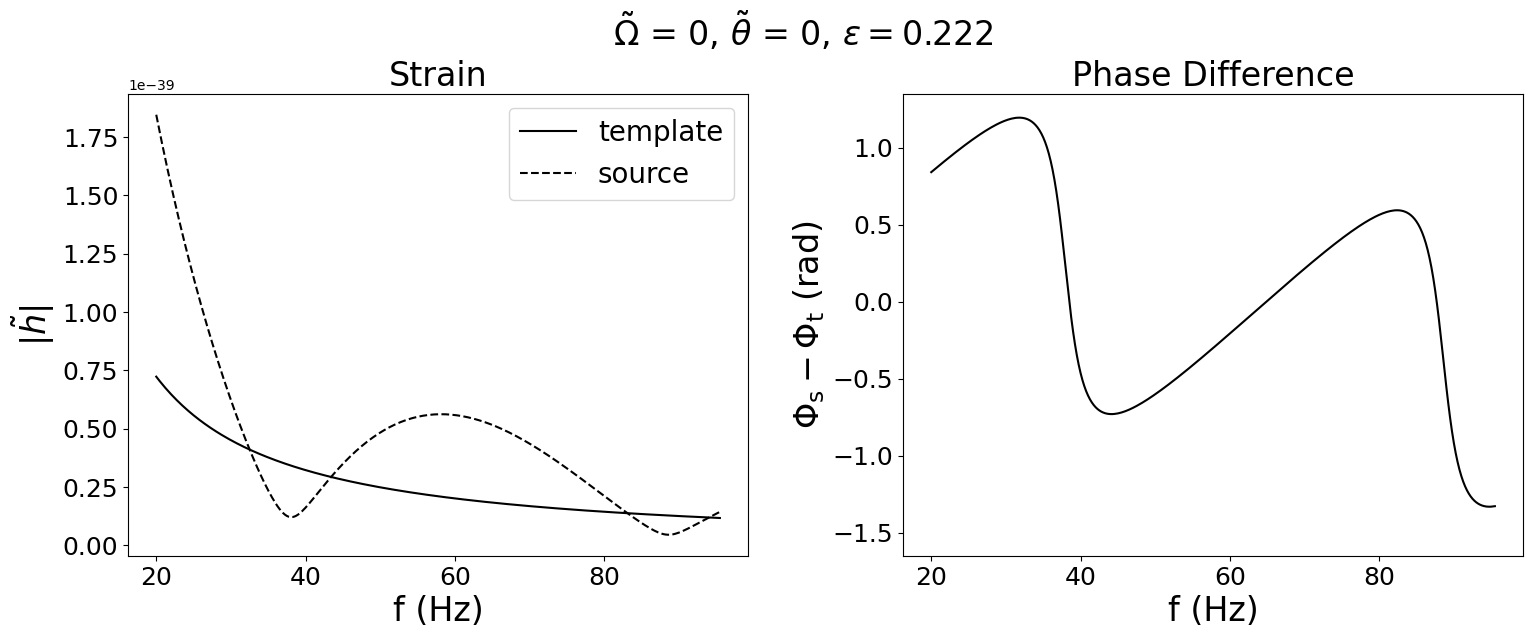

In [117]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

RP_params["omega_tilde"] = 0
RP_params["theta_tilde"] = 0
RP_params["gamma_P"] = 0

waveform_comparison(RP_params, lens_params)

3.571269209663861e-09 7.751531722297038e-10
(-0.1432096323221112, 0.19496586124030063)


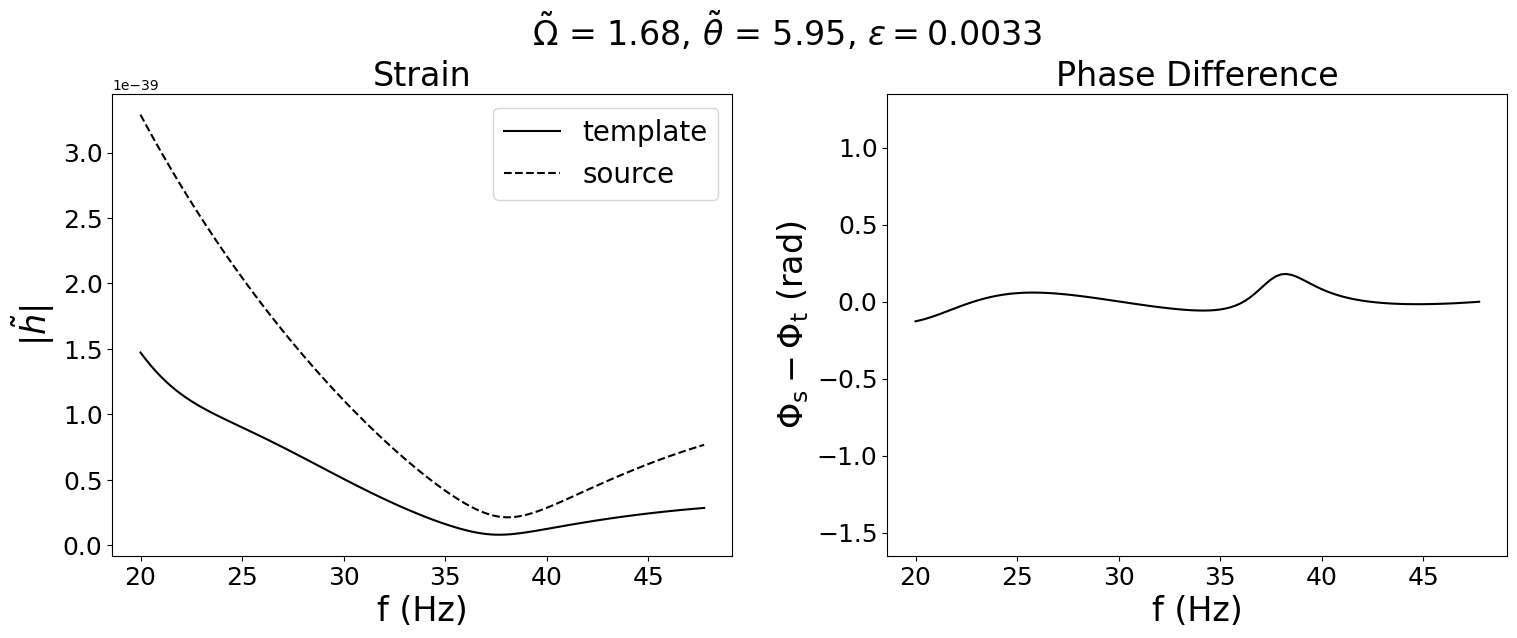

In [118]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = 40 * solar_mass

RP_params["omega_tilde"] = 1.68
RP_params["theta_tilde"] = 5.95
RP_params["gamma_P"] = 2.92

waveform_comparison(RP_params, lens_params)

-6.126965049247498e-10 4.2746288180826845e-09
(-0.8373332832236207, 0.841234818267095)


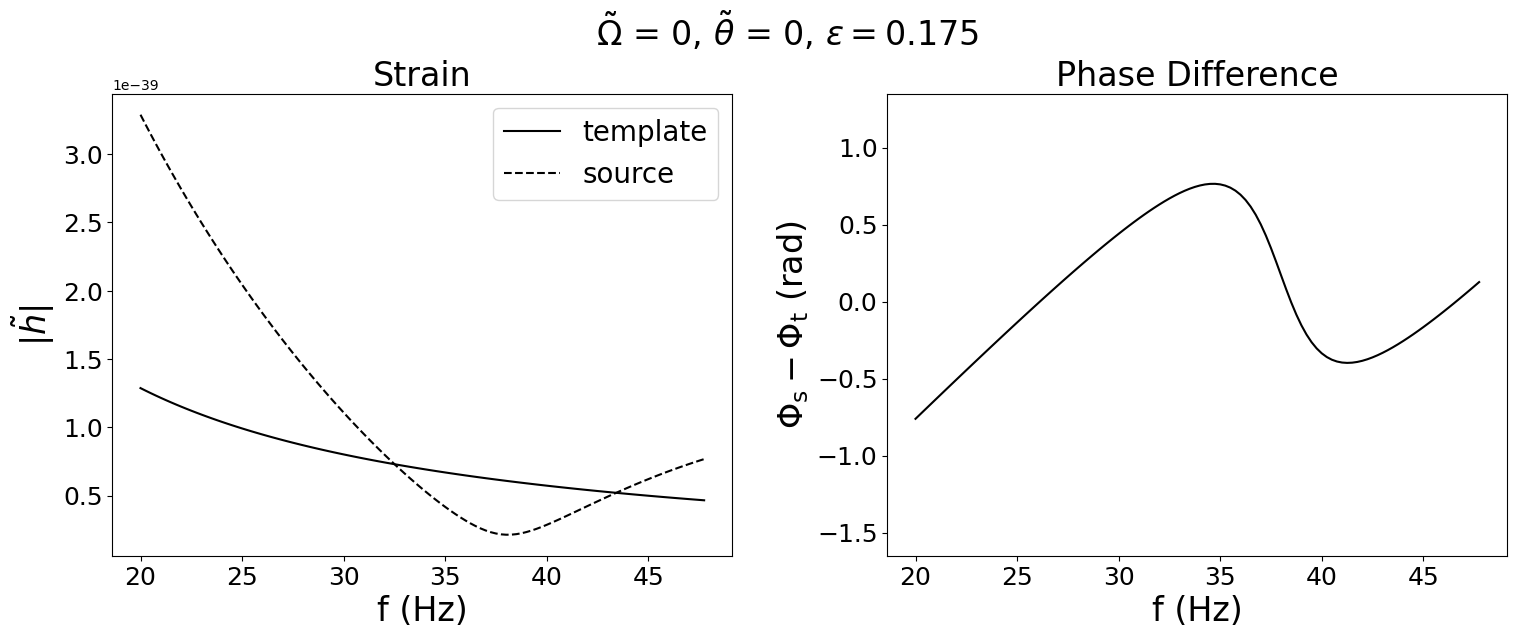

In [119]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = 40 * solar_mass

RP_params["omega_tilde"] = 0
RP_params["theta_tilde"] = 0
RP_params["gamma_P"] = 0

waveform_comparison(RP_params, lens_params)